In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv("/content/income.csv")

In [ ]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'income')

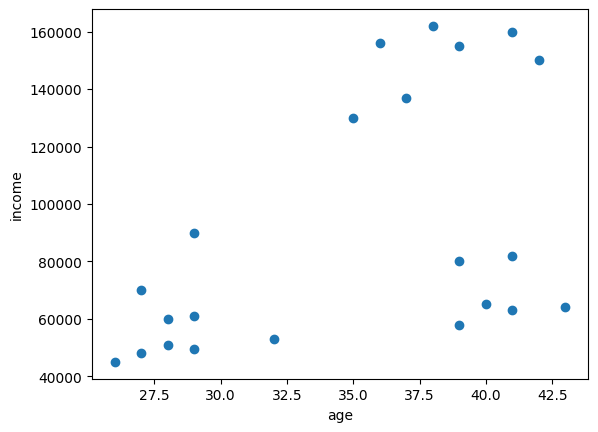

In [ ]:
plt.scatter(df.Age, df['Income($)'])
plt.xlabel('age')
plt.ylabel('income')

In [ ]:
df1 = df.drop('Name', axis = 'columns')

In [ ]:
df1.head()

,Age,Income($)
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000


In [ ]:
kmeans = KMeans(n_clusters = 3)

In [ ]:
y_predicted = kmeans.fit_predict(df1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [ ]:
df1['cluster'] = y_predicted
df1.head()

,Age,Income($),cluster
0,27,70000,2
1,29,90000,2
2,29,61000,0
3,28,60000,0
4,42,150000,1


In [ ]:
kmeans.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

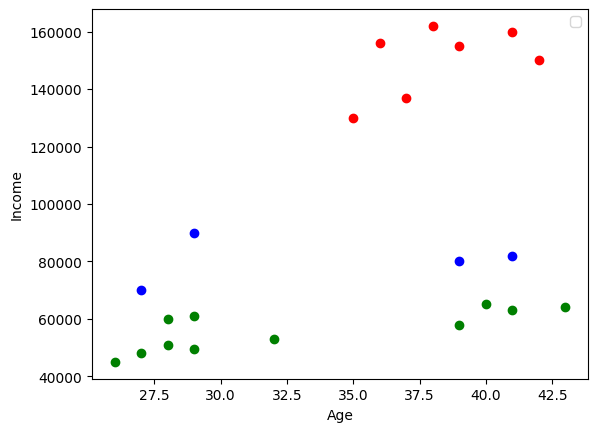

In [ ]:
df2 = df1[df1.cluster ==0]
df3 = df1[df1.cluster ==1]
df4 = df1[df1.cluster ==2]

plt.scatter(df2.Age, df2['Income($)'], color = 'green')
plt.scatter(df3.Age, df3['Income($)'], color = 'red')
plt.scatter(df4.Age, df4['Income($)'], color = 'blue')

plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(df1[['Income($)']])
df1['Income($)'] = scaler.transform(df1[['Income($)']])

In [ ]:
scaler.fit(df1[['Age']])
df1['Age'] = scaler.transform(df1[['Age']])

In [ ]:
df1.head()

,Age,Income($),cluster
0,0.058824,0.213675,2
1,0.176471,0.384615,2
2,0.176471,0.136752,0
3,0.117647,0.128205,0
4,0.941176,0.897436,1


Text(0, 0.5, 'income')

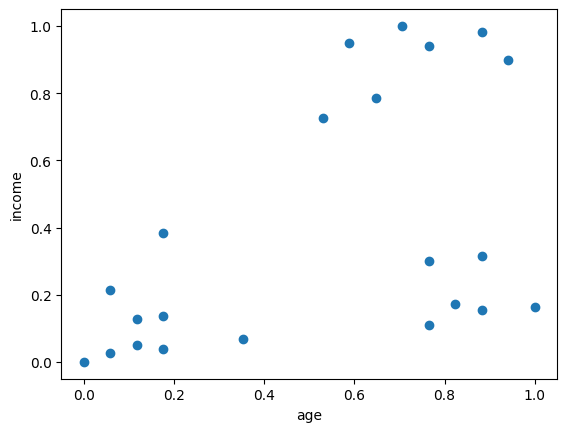

In [ ]:
plt.scatter(df1.Age, df1['Income($)'])
plt.xlabel('age')
plt.ylabel('income')

In [ ]:
kmeans = KMeans(n_clusters = 3)

In [ ]:
y_predicted = kmeans.fit_predict(df1[['Age','Income($)']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [ ]:
df1['cluster']=y_predicted
df1.head()

,Age,Income($),cluster
0,0.058824,0.213675,0
1,0.176471,0.384615,0
2,0.176471,0.136752,0
3,0.117647,0.128205,0
4,0.941176,0.897436,2


In [ ]:
kmeans.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ]])

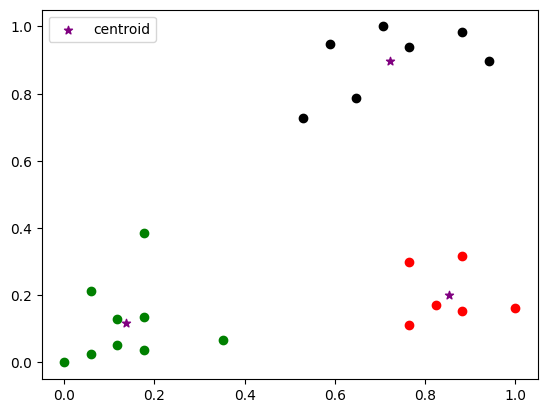

In [ ]:
df2 = df1[df1.cluster==0]
df3 = df1[df1.cluster==1]
df4 = df1[df1.cluster==2]
plt.scatter(df2.Age,df2['Income($)'],color='green')
plt.scatter(df3.Age,df3['Income($)'],color='red')
plt.scatter(df4.Age,df4['Income($)'],color='black')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [ ]:
error = []
k_range = range(1,10)
for i in k_range:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(df1[['Age','Income($)']])
  error.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

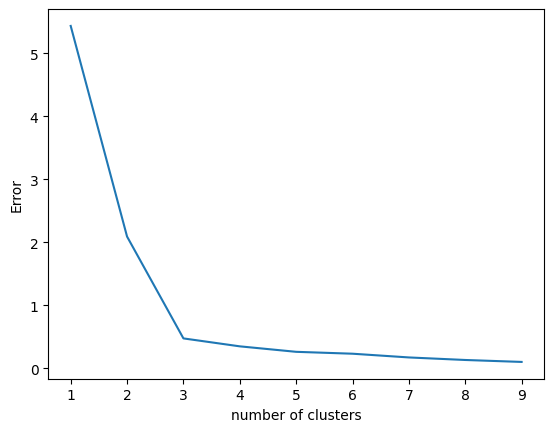

In [ ]:
plt.xlabel('number of clusters')
plt.ylabel('Error')
plt.plot(k_range, error)